# Seconda Prova Esonero - Metodi AI e Machine Learning per la fisica 
### 08.06.2021 - AA 2021/22 - Docente: S. Giagu


> **Regole:**

*   **tempo a disposizione:** 1h45'

*   compilare con i vostri dati i campi della cella che segue e poi eseguire la cella verificando che i dati printati corrispondano
*   risolvere i quesiti/compiti indicati nella cella *Descrizione del compito* usando questo notebook 
*   una volta completato il compito sottomettere il notebook nel apposito folder sul sito e-learning del corso disponibile al link: <p>
[consegna esonero](https://elearning.uniroma1.it/mod/assign/view.php?id=483473) <p>
NOTA BENE: una volta sottomesso il notebook non sono più possibili ulteriori modifiche

In [77]:
#@ Dati Personali
import os

Nome = 'Giovanbattista'  #@param {type: "string"}
Cognome = 'Favorito' #@param {type: "string"}
NumeroMatricola = 1939167 #@param {type: "number"}


if NumeroMatricola == 12345678:
  print('\033[1;31m Inserisci il numero di matricola corretto!!!!') 
else:
  print('Downloading datasets')
  !rm -rf diffr_data.npz
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hbTn7GACjEG-N4wGUCKojqlDBHr4QQ8x' -O- | sed -rn 's/.*confirm=([1-9A-Za-z_]+).*/\1\n/p')&id=1hbTn7GACjEG-N4wGUCKojqlDBHr4QQ8x" -O diffr_data.npz && rm -rf /tmp/cookies.txt
  print('Done')

--2023-06-11 22:49:55--  https://docs.google.com/uc?export=download&confirm=&id=1hbTn7GACjEG-N4wGUCKojqlDBHr4QQ8x
Resolving docs.google.com (docs.google.com)... 142.250.99.100, 142.250.99.102, 142.250.99.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.99.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qasjtl8mu4se0c2eml3iiihuhjaitts5/1686523725000/03615031767846521878/*/1hbTn7GACjEG-N4wGUCKojqlDBHr4QQ8x?e=download&uuid=f5c037a1-9b1f-4795-9cf4-1ac553e96259 [following]
--2023-06-11 22:49:56--  https://doc-0c-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qasjtl8mu4se0c2eml3iiihuhjaitts5/1686523725000/03615031767846521878/*/1hbTn7GACjEG-N4wGUCKojqlDBHr4QQ8x?e=download&uuid=f5c037a1-9b1f-4795-9cf4-1ac553e96259
Resolving doc-0c-1o-docs.googleusercontent.com (doc-0c-1o-docs.googleusercontent.com)... 173.194.203.132, 

# Descrizione del compito:

### Dataset:

il dataset fornito è costituito da un file formato *.npz* (numpy compresso): *Ddiffr_datanpz*
*   contiene in formato numpy 2 array: *X*, e *Y* di shape:

```
import numpy as np
fil = np.load('diffr_data.npz')
X = fil['X']
Y = fil['Y']
print(X.shape)
print(Y.shape)

X shape :  (3000, 200, 5)
Y shape :  (3000,)
```

*X* contiene immagini di dimensione (200,5) in scala di grigio di spettri di interferenza da doppia fenditura (includono effetti di rumore e risoluzione sperimentale), ottenuti per diversi valori del rapporto $\frac{\delta}{\lambda}$ tra distanza tra le fedniture e lunghezza d'onda dell'onda sferica che investe le due fenditure.

*Y* contiene i valori corrispondenti di $\frac{\delta}{\lambda}$

**Compiti:**

0.   leggere in numpy i due array e analizzare le caratteristiche che si ritengono più significative del dataset, plottando 9 immagini scelte in modo random da *X* 
1.   addestrare una rete convoluzionale al task di predire il valore del target *Y* a partire dalle immagini e misurarne le prestazioni in modo opportuno
2.   plottare l'andamento di $\hat{Y}$ predetto vs $Y$ vero
3.   provare ad allenare per la stessa task una rete densa che prenda in input solo la prima riga verticale delle immagini (e.g. $X[:,:,0]$, quindi un input piatto di dimensione 200), e confrontarne le prestazioni ottenute rispetto a quelle del punto 2 

* commentare opportunamente i risultati ottenuti in ogni punto

# PUNTO 0

In [78]:
#Importo dataset
import numpy as np
fil = np.load('diffr_data.npz')
X = fil['X']
Y = fil['Y']
print(X.shape)
print(Y.shape)

(3000, 200, 5)
(3000,)


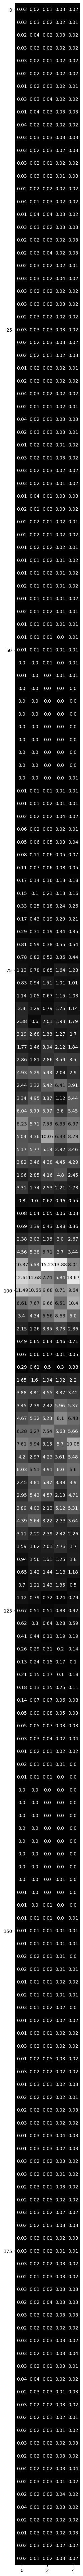

In [79]:
import matplotlib.pyplot as plt
import random

#Com'è fatta un'immagine
img = X[0].reshape((200,5))

fig = plt.figure(figsize = (50,100)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')


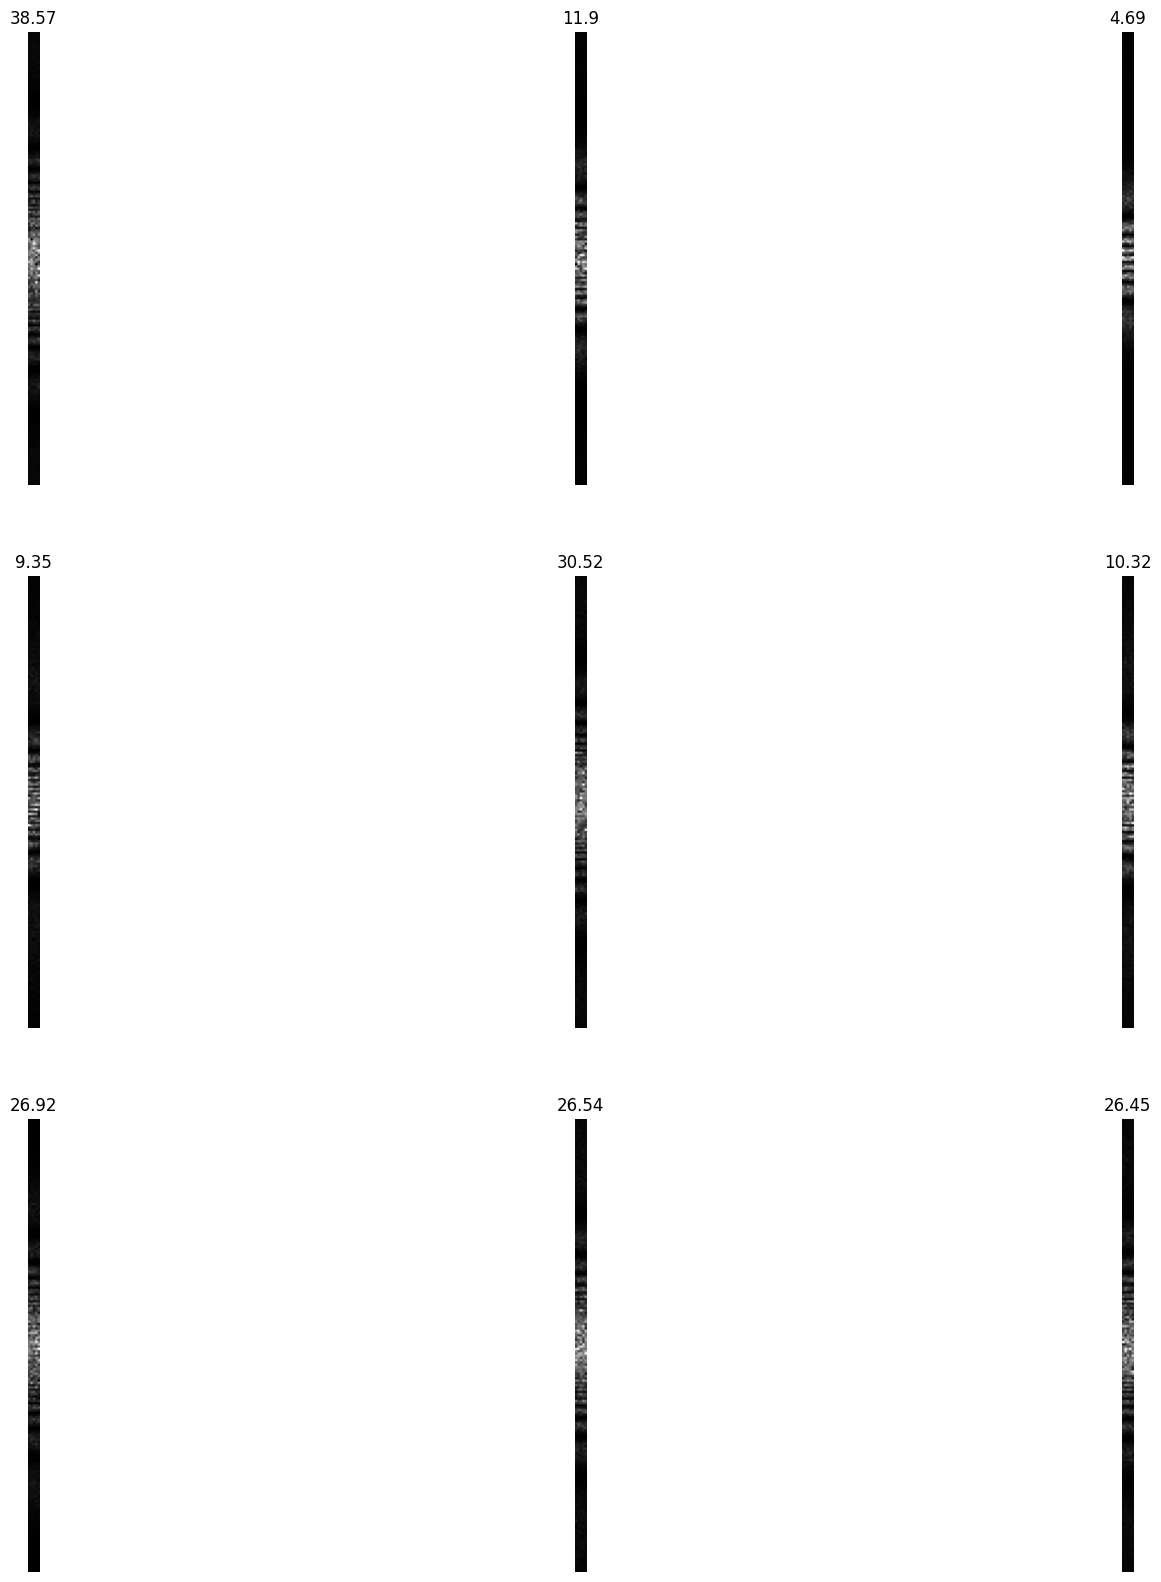

In [80]:
#Plotto 9 immagini random
figure = plt.figure(figsize=(20, 20))
cols, rows = 3,3
for i in range(1, cols * rows + 1):
    sample_idx = np.random.randint(len(X))
    img, label = X[sample_idx], Y[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(np.round(label, 2))
    plt.axis("off")
    plt.imshow(img.reshape((200,5)), cmap="gray")
plt.show()

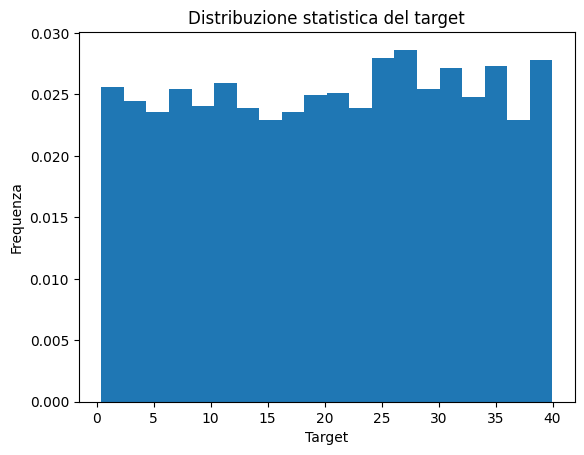

In [81]:
#Distribuzione del target
plt.title("Distribuzione statistica del target")
plt.xlabel("Target")
plt.ylabel("Frequenza")
_, _, _ = plt.hist(Y, density = True, bins = 20)

La distribuzione del target è pressoché uniforme

In [82]:
#Statistica descrittiva
print(f"X max: {np.max(X)}")
print(f"X min: {np.min(X)}")
print(f"Y max: {np.max(Y)}")
print(f"Y min: {np.min(Y)}")

print()
print(f"X mean: {np.mean(X)}")
print(f"X std dev: {np.std(X)}")
print(f"Y mean: {np.mean(Y)}")
print(f"Y std dev: {np.std(Y)}")


X max: 21.576121496098107
X min: 0.0
Y max: 39.97479332528447
Y min: 0.40595185638141285

X mean: 1.1685175874251137
X std dev: 1.7133172821106781
Y mean: 20.475890646005066
Y std dev: 11.438735190359553


In [83]:
#Normalizzo vettore dei label con media 0 e std 1
#Aiuta funzioni di loss e metrica

Ymean = np.mean(Y)
Ydev = np.std(Y)

Y_norm = (Y-Ymean)/Ydev
print(f"Y norm mean: {np.mean(Y_norm)}")
print(f"Y norm std dev: {np.std(Y_norm)}")

print()
print(f"Y norm max: {np.max(Y_norm)}")
print(f"Y norm min: {np.min(Y_norm)}")

Y norm mean: 1.4003613083938642e-16
Y norm std dev: 0.9999999999999998

Y norm max: 1.7046380001621926
Y norm min: -1.754559263382405


La normalizzazione torna.

In [84]:
#Divido il campione di features in train, validation e test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_norm, test_size=0.40, shuffle = True)
X_vali, X_test, Y_vali, Y_test = train_test_split(X_test, Y_test, test_size=0.50, shuffle = True)

print(f"X train shape: {X_train.shape}")
print(f"Y train shape: {Y_train.shape}")
print(f"X vali shape: {X_vali.shape}")
print(f"Y vali shape: {Y_vali.shape}")
print(f"X test shape: {X_test.shape}")
print(f"Y test shape: {Y_test.shape}")

X train shape: (1800, 200, 5)
Y train shape: (1800,)
X vali shape: (600, 200, 5)
Y vali shape: (600,)
X test shape: (600, 200, 5)
Y test shape: (600,)


In [98]:
#Normalizzo il vettore delle features usando solo il train dataset
X_mean = np.mean(X_train)
X_std = np.std(X_train)

X_train_norm = (X_train - X_mean)/X_std
X_vali_norm = (X_vali - X_mean)/X_std
X_test_norm = (X_test - X_mean)/X_std

print(f"X train norm: media = {np.mean(X_train_norm)} \t dev std = {np.std(X_train_norm)}")
print(f"X vali norm: media = {np.mean(X_vali_norm)} \t dev std = {np.std(X_vali_norm)}")
print(f"X test norm: media = {np.mean(X_test_norm)} \t dev std = {np.std(X_test_norm)}")

X train norm: media = -4.3056521311276204e-16 	 dev std = 0.9999999999999998
X vali norm: media = -0.0011703089193244973 	 dev std = 0.9968199200190322
X test norm: media = -0.0024703940329079653 	 dev std = 0.9965249983163198


In [100]:
#Reshape dei tensori per la rete neurale convoluzionale
X_train_norm = X_train_norm.reshape(len(X_train_norm), 200, 5, 1)
X_vali_norm = X_vali_norm.reshape(len(X_vali_norm), 200, 5, 1)
X_test_norm = X_test_norm.reshape(len(X_test_norm), 200, 5, 1)

# PUNTO 1

In [102]:
import torch
#Converto in tensori torch
X_train_pt = torch.Tensor(X_train_norm).float()
Y_train_pt = torch.Tensor(Y_train).float()
X_vali_pt = torch.Tensor(X_vali_norm).float()
Y_vali_pt = torch.Tensor(Y_vali).float()
X_test_pt = torch.Tensor(X_test_norm).float()
Y_test_pt = torch.Tensor(Y_test).float()

print(X_train_pt.shape)
print(Y_train_pt.shape)
print(X_vali_pt.shape)
print(Y_vali_pt.shape)
print(X_test_pt.shape)
print(Y_test_pt.shape)

#Reshape dei tensori per mettere il canale per primo
X_train_pt = X_train_pt.permute((0,3,1,2))
X_vali_pt = X_vali_pt.permute((0,3,1,2))
X_test_pt = X_test_pt.permute((0,3,1,2))

#Dataset
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(X_train_pt, Y_train_pt) #creo dataset
vali_dataset = TensorDataset(X_vali_pt, Y_vali_pt)
test_dataset = TensorDataset(X_test_pt, Y_test_pt)

#Dataloader
batch_size = 64
dataloaders = dict() #usiamo un dizionario epr comodità
dataloaders['train'] = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dataloaders['vali'] = DataLoader(vali_dataset, batch_size=batch_size, shuffle=True)
dataloaders['test'] = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

torch.Size([1800, 200, 5, 1])
torch.Size([1800])
torch.Size([600, 200, 5, 1])
torch.Size([600])
torch.Size([600, 200, 5, 1])
torch.Size([600])


In [103]:
# controlliamo se la GPU è disponibile e nel caso quale tipo di GPU
if torch.cuda.is_available():
  print('Numero di GPU disponibili: ',torch.cuda.device_count())
  for i in range(0,torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

# se la GPU è disponibile setto device='cuda', altrimenti 'cpu
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")

Numero di GPU disponibili:  1
Tesla T4
Computation device: cuda



In [104]:
from torch import nn
import torch.nn.functional as F

class myVGG(nn.Module):
  def __init__(self):
    super(myVGG, self).__init__()

    # definizione dei layers

    # primo blocco convoluzionale
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = (3,2))
    self.pool1 = nn.MaxPool2d(kernel_size = (3,1))

    # secondo blocco convoluzionale
    self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = (3,2))
    self.pool2 = nn.MaxPool2d(kernel_size = (3,1))

    # primo blocco convoluzionale
    self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3,2))
    self.pool3 = nn.MaxPool2d(kernel_size = (3,1))
    
    # flatten
    self.flatten = nn.Flatten() #Flatten layer

    # MLP 
    self.drop1 = nn.Dropout(p=0.5)
    self.fc1 = nn.Linear(in_features = 768, out_features = 64)
    self.drop2 = nn.Dropout(p=0.5)
    self.fc2 = nn.Linear(in_features = 64, out_features = 64)
    self.fc3 = nn.Linear(in_features = 64, out_features = 1)

  # forward pass: x (input) -> out  
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool1(x)
    x = F.relu(self.conv2(x))
    x = self.pool2(x)
    x = F.relu(self.conv3(x))
    x = self.pool3(x)
    #flatten
    x = self.flatten(x)

    #mlp
    x = self.drop1(x)
    x = self.fc1(x)
    x = F.relu(x)

    x = self.drop2(x)
    x = self.fc2(x)
    x = F.relu(x)

    out = self.fc3(x)

    return out

In [105]:
# printout del modello
model = myVGG()
print(model)

from torchsummary import summary
if torch.cuda.is_available():
  summary(model.cuda(), input_size=(1,200,5))
else:
  summary(model, input_size=(1,200,5))

myVGG(
  (conv1): Conv2d(1, 32, kernel_size=(3, 2), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=(3, 1), stride=(3, 1), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 2), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=(3, 1), stride=(3, 1), padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 2), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=(3, 1), stride=(3, 1), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (drop1): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=768, out_features=64, bias=True)
  (drop2): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 198, 4]             224
         MaxPool2d-2

In [106]:
#Test
xb, yb = next(iter(dataloaders['train']))

xb = xb.to(device)
yb = yb.to(device)

model.to(device)

out = model(xb)

print('Input rete neurale: ', xb.shape)
print('Output rete neurale: ', out.shape)
print(out[0])

Input rete neurale:  torch.Size([64, 1, 200, 5])
Output rete neurale:  torch.Size([64, 1])
tensor([0.0016], device='cuda:0', grad_fn=<SelectBackward0>)


In [107]:
#install torchmetrics: collection of useful PyTorch metrics implementations and an easy-to-use API to create custom metrics
%pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 15.4 MB/s eta 0:00:00


In [119]:
#loss (usiamo MSE)
loss_func=torch.nn.MSELoss()

#metrica (usiamo MAE)
metric_func=torch.nn.L1Loss()

#ottimizzatore
lr = 1e-3
opt=torch.optim.Adam(model.parameters(), lr=lr)     

In [120]:
class SaveBestModel:
    def __init__(self, best_valid_loss=float('inf')):
        self.best_valid_loss = best_valid_loss
        
    def __call__(self, current_valid_loss, epoch, model):
        if current_valid_loss < self.best_valid_loss:
            self.best_valid_loss = current_valid_loss
            print("\nFound new best validation loss: %f in epoch %i" %(self.best_valid_loss, epoch+1))
            print("Saving model...")
            torch.save(model, 'best_model.pt')

save_model=SaveBestModel()


In [123]:
#Training
import time

save_model=SaveBestModel()
model=myVGG()
opt=torch.optim.Adam(model.parameters(), lr=lr)
model=model.to(device)

epochs=100

hist_loss = []
hist_metric=[]
hist_vloss = []
hist_vmetric=[]

start_t=time.time()

for epoch in range(epochs):
  t0=time.time()

  # training
  model.train()
  train_loss=0
  train_metric=0
  counter=0
  for xb, yb in dataloaders['train']:
    counter += 1
    xb=xb.to(device)
    yb=yb.to(device)

    pred=model(xb)
    loss=loss_func(pred.view(-1), yb)
    metric=metric_func(pred.view(-1), yb)

    train_metric+=metric.item()
    train_loss+=loss.item()

    #update weights
    opt.zero_grad()
    loss.backward()
    opt.step()

  train_loss /=counter
  train_metric/=counter
  hist_loss.append(train_loss)
  hist_metric.append(train_metric)

  model.eval()
  vali_loss=0
  vali_metric=0
  counter=0

  with torch.no_grad():
    for xb, yb in dataloaders['vali']:
      counter += 1
      xb=xb.to(device)
      yb=yb.to(device)
      
      pred=model(xb)

      vloss=loss_func(pred.view(-1), yb)
      vmetric=metric_func(pred.view(-1), yb)

      vali_loss += vloss.item()
      vali_metric += vmetric.item()


  vali_loss /= counter
  vali_metric /= counter
  hist_vloss.append(vali_loss)
  hist_vmetric.append(vali_metric)

  elapsed_time = time.time()-t0
  print("epoch: %d, time [s]: %.4f, train loss: %.6f, train mae: %.6f, vali loss: %.6f, vali mae: %.6f"  %(epoch+1, elapsed_time, train_loss, train_metric ,vali_loss, vali_metric))
  save_model(vali_loss, epoch, model)
     

epoch: 1, time [s]: 0.1084, train loss: 0.750869, train mae: 0.722329, vali loss: 0.674370, vali mae: 0.587527

Found new best validation loss: 0.674370 in epoch 1
Saving model...
epoch: 2, time [s]: 0.1102, train loss: 0.401675, train mae: 0.495257, vali loss: 0.103327, vali mae: 0.253575

Found new best validation loss: 0.103327 in epoch 2
Saving model...
epoch: 3, time [s]: 0.1141, train loss: 0.148067, train mae: 0.299996, vali loss: 0.039511, vali mae: 0.149565

Found new best validation loss: 0.039511 in epoch 3
Saving model...
epoch: 4, time [s]: 0.1101, train loss: 0.104710, train mae: 0.249561, vali loss: 0.044263, vali mae: 0.163901
epoch: 5, time [s]: 0.1147, train loss: 0.089919, train mae: 0.230865, vali loss: 0.045913, vali mae: 0.166465
epoch: 6, time [s]: 0.1441, train loss: 0.085599, train mae: 0.226884, vali loss: 0.041509, vali mae: 0.167390
epoch: 7, time [s]: 0.1591, train loss: 0.081512, train mae: 0.216697, vali loss: 0.039975, vali mae: 0.158459
epoch: 8, time [

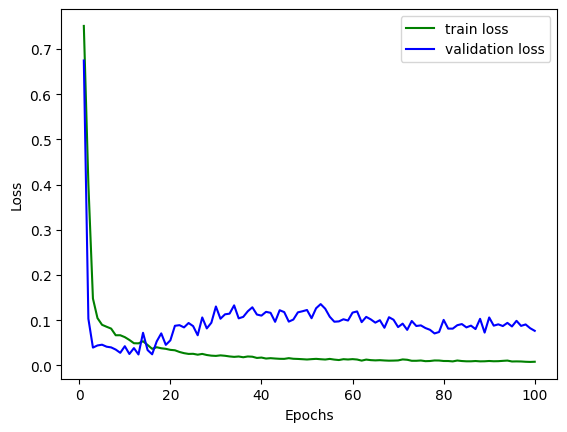

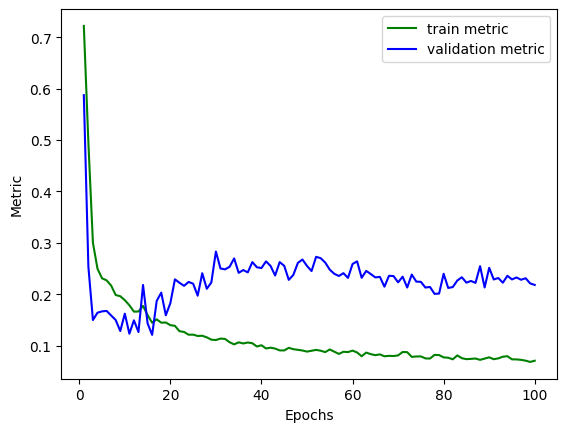

In [125]:
# grafico monitoring training
# loss vs epoca per train e validation
plt.figure()
plt.plot(range(1, len(hist_loss) + 1), hist_loss, color = 'green', linestyle = '-', label = 'train loss')
plt.plot(range(1, len(hist_vloss) + 1), hist_vloss, color = 'blue', linestyle = '-', label = 'validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy vs epoca per train e validation
plt.figure()
plt.plot(range(1, len(hist_metric) + 1), hist_metric, color = 'green', linestyle = '-', label = 'train metric')
plt.plot(range(1, len(hist_vmetric) + 1), hist_vmetric, color = 'blue', linestyle = '-', label = 'validation metric')
plt.xlabel('Epochs')
plt.ylabel('Metric')
plt.legend()

plt.show()

# PUNTO 2

In [142]:
# load best model

model=torch.load('./best_model.pt')
model.eval()
model.to("cpu")

counter=0
test_loss=0
test_metric=0
yhat=[]
y=[]

with torch.no_grad():
    for xb, yb in dataloaders['test']:
      counter+=1
      xb=xb.to("cpu")
      yb=yb.to("cpu")
      pred = model(xb)
      

      tloss=loss_func(pred.view(-1), yb)
      tmetric=metric_func(pred.view(-1), yb)

      test_loss += tloss.item()
      test_metric += tmetric.item()

      yhat.append(pred)
      y.append(yb)

test_loss/=counter
test_metric/=counter

print("Test loss:", test_loss, "Test metric: ", test_metric)
     

Test loss: 0.02407502681016922 Test metric:  0.12545991763472558


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2826: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2826: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


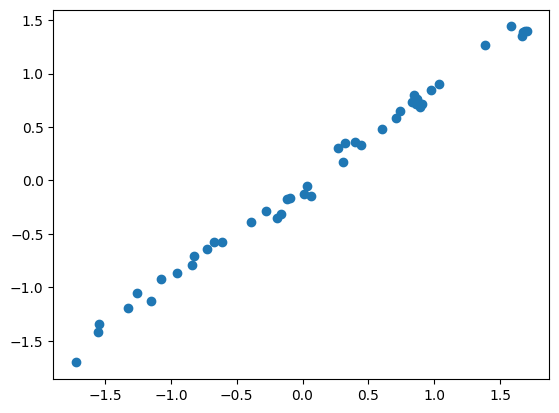

In [154]:
#Scatter plot y vs yhat
ynew = []
yhatnew = []

for i in range(len(y)):
  for j in range(i):
    ynew.append(y[i][j])
    yhatnew.append(yhat[i][j])

plt.scatter(ynew, yhatnew)